# Damas





## Objetivo

O objetivo do jogo é capturar todas as peças inimigas ou posicionar uma peça do outro lado do tabuleiro primeiro que seu adversário.

# Tabuleiro

É possível aumentar ou diminuir o tabuleiro, o jogo não será invalidado por conta disso, já que é só aumentar ou diminuir o número de peças. 

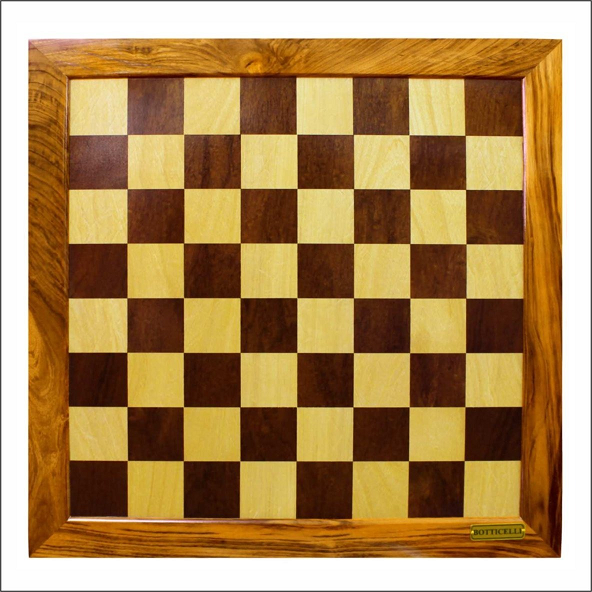

## Regras

# Condição de Movimentação

Cada peça pode se movimentar para a casa seguinte na diagonal.

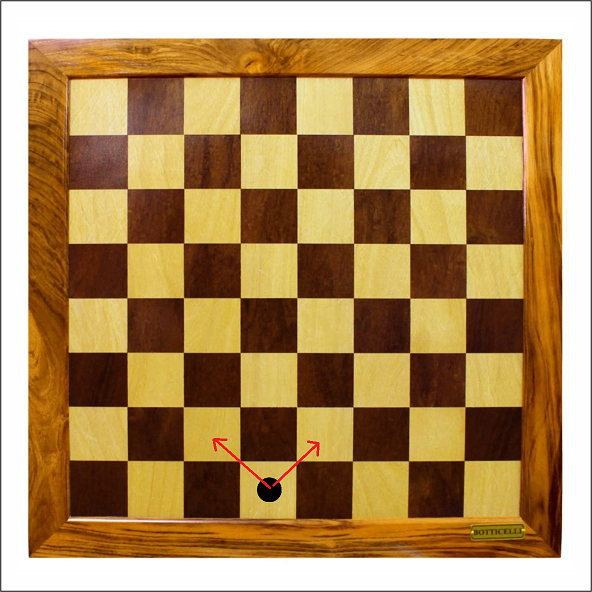

Se uma peça adversária está na diagonal, pode-se capturá-la, desde que na diagonal da frente da peça adversária não haja nenhuma peça.

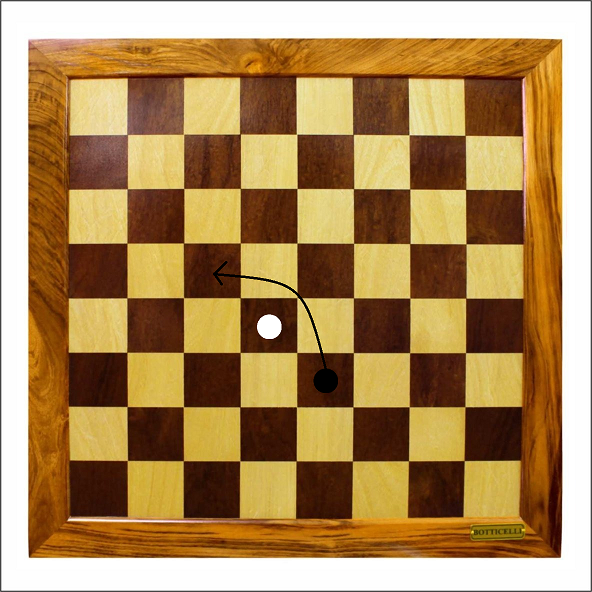

##Condição de Vitória

Peça preta atingiu a primeira linha do adversário.

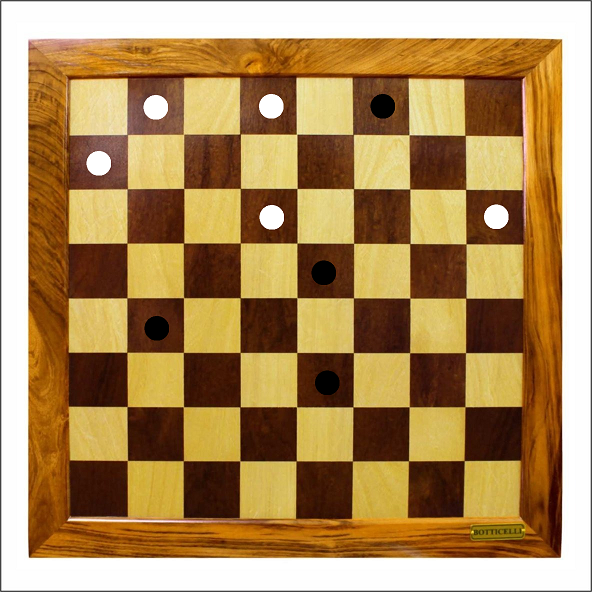

Todas as peças adversárias foram capturadas.

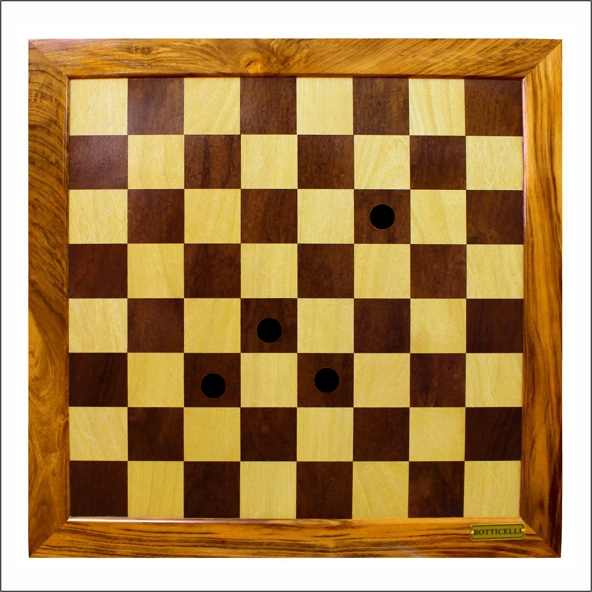



```
# Isto está formatado como código
```

### Desenhando Tabuleiro

In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from PIL import Image, ImageDraw, ImageFont, ImageDraw

class Tabuleiro:

  #codigo das pecas
  peca1 = 1
  peca2 = -1
  tabuleiroVazio = 0

  turn = peca1
  
  # Numero de linhas e colunas
  linhasColunas = 0

  # Tamanho
  tamanho = 0
  tamanhoBorda = 0
  tamanhoBordaPeca = 0 #borda de cada peça

  #definição de cores
  corQuadrado1 = 'black' 
  corQuadrado2 = 'white'
  corPeca1 = 'white' # peça que ficará sob o quadrado 1
  corPeca2 = 'black' # peça que ficará sob o quadrado 2
  corBorda = 'white' 
  corBordaPeca = 'blue' 

  knowledge = {} #guarda o conhecimento de cada jogada


  # Guarda o tabuleiro em imagem
  drawTabuleiro = None

  # Guarda as tuplas do jogo
  tabuleiro = ()

  # Metodo construtor guardando as linhas e colunas
  def __init__(self,
    tamanho,
    corQuadrado1 = 'black',
    corQuadrado2 = 'white',
    corPeca1 = 'white',
    corPeca2 = 'black',
    corBorda = 'white',
    corBordaPeca = 'blue',
    tamanhoBorda = 0, 
    tamanhoBordaPeca = 10, 
  ):


    self.tamanho = tamanho
    self.tamanhoBordaPeca = tamanhoBordaPeca
    self.tamanhoBorda = tamanhoBorda 
    self.corBorda = corBorda 
    self.corBordaPeca = corBordaPeca 
    self.corQuadrado1 = corQuadrado1
    self.corQuadrado2 = corQuadrado2
    self.corPeca1 = corPeca1
    self.corPeca2 = corPeca2




  # verifica se o quadrado pode receber a peça
  def posicaoValida(self,index,tabuleiro): 
    operador1 = (index // self.linhasColunas) % 2 == 0
    operador2 = index % 2 == 0

    if (operador1 and not operador2) or (operador2 and not operador1):
      return True
    else:
      return False




  # verifica se acabou o jogo
  def winner(self,tab):
    quantidadePeca1 = 0
    quantidadePeca2 = 0    
    
    tamanho = len(tab)

    for i,k in enumerate(tab):
      
      
      # se for uma peca 1
      if k == self.peca1:
        quantidadePeca1 += 1
        
      # se for uma peça 2
      if k == self.peca2:
        quantidadePeca2 += 1

      # se houver uma peça 2 no linha 1, acabou o jogo
      if k == self.peca2 and i < self.linhasColunas:        
        return self.peca2
        

      # se houver uma peça 1 no linha 2, acabou o jogo
      if k == self.peca1 and i >= tamanho- self.linhasColunas:
        return self.peca1

    # se não houver peça 1 acaba o jogo
    if quantidadePeca1 == 0:
      return self.peca2

    # se não houver peça 2 acaba o jogo
    if quantidadePeca2 == 0:
      return self.peca1

    return False 



  
  # gerar o tabuleior inicial do jogo
  def gerarTabuleiroInicial(self,tamanho):
    elementos = []
    self.setTamanhoTabuleiro(tamanho)
    for i in range(tamanho):

      valor = self.tabuleiroVazio

      #gera as peças 1 da parte superior
      if (self.posicaoValida(i,tabuleiro)) and i < 3*self.linhasColunas:
        valor = self.peca1

      #gera as peças 2 da parte inferior
      if (self.posicaoValida(i,tabuleiro)) and i >= tamanho-(3*self.linhasColunas):
        valor = self.peca2

      elementos.append(valor)    

    return elementos


  # verifica se a jogda é valida
  def jogadaValida(self,de,para):
    # calculo da linha em que esta
    linhaDe = de // self.linhasColunas
    linhaPara = para // self.linhasColunas

    valids = False  

    posicaoMedia = 0 

    # verifica se é um quadrado valido
    if self.posicaoValida(para,self.tabuleiro):
      valids = True;
    
    # se a posicação é valida e a peça for do tipo 1
    if valids and self.turn == self.peca1:
      # verifica os quadrantes da frente estão validos
      valids = ((de + self.linhasColunas + 1) == para or (de + self.linhasColunas - 1) == para) and self.tabuleiro[para] == self.tabuleiroVazio

      qtdLinhasPuladas = linhaPara - linhaDe
      posicaoMedia = (de + para)//2

      # verifica se a peça para pular, pode ser comida
      if qtdLinhasPuladas == 2 and self.tabuleiro[posicaoMedia] == self.peca2 and self.tabuleiro[para] == self.tabuleiroVazio and ((de + (self.linhasColunas*2) + 2) == para or (de + (self.linhasColunas*2) - 2) == para) and self.posicaoValida(para,self.tabuleiro):
        valids = True

      # caso pule duas linhas e não atender os requisitos, é inválida
      elif valids and qtdLinhasPuladas >= 2:
        valids = False


    # verifica se a peça é do tipo 2
    elif valids and self.turn == self.peca2:

      # verifica os quadrantes da frente estão validos
      valids = ((de - self.linhasColunas - 1) == para or (de - self.linhasColunas + 1) == para) and self.tabuleiro[para] == self.tabuleiroVazio

      qtdLinhasPuladas = linhaDe - linhaPara  
      posicaoMedia = (de + para)//2

      # verifica se a peça para pular, pode ser comida
      if qtdLinhasPuladas == 2 and self.tabuleiro[posicaoMedia] == self.peca1 and self.tabuleiro[para] == self.tabuleiroVazio and ((de - (self.linhasColunas*2) - 2) == para or (de - (self.linhasColunas*2) + 2) == para) and self.posicaoValida(para,self.tabuleiro):

        valids = True

      # caso pule duas linhas e não atender os requisitos, é inválida
      elif valids and qtdLinhasPuladas >= 2:
        valids = False

    
    
    return valids

  #faz a função de comer a peça
  def comer(self,de,para,tabuleiro = False):

    tab = [];

    if tabuleiro:
      tab = list(tabuleiro)


    # calculo da linha em que esta
    linhaPara = para // self.linhasColunas
    linhaDe = de // self.linhasColunas

    posicaoMedia = (de + para)//2

    # se a  peça for do tipo 1
    if self.turn == self.peca1:
      qtdLinhasPuladas = linhaPara - linhaDe

      # verifica se a peça para pular, pode ser comida
      if qtdLinhasPuladas == 2 and self.tabuleiro[posicaoMedia] == self.peca2:
        tab[de] = self.tabuleiroVazio
        tab[posicaoMedia] = self.tabuleiroVazio
        tab[para] = self.peca1

    # verifica se a peça é do tipo 2
    elif self.turn == self.peca2:
      qtdLinhasPuladas = linhaDe - linhaPara 

      # verifica se a peça para pular, pode ser comida
      if qtdLinhasPuladas == 2 and self.tabuleiro[posicaoMedia] == self.peca1:
        tab[de] = self.tabuleiroVazio
        tab[posicaoMedia] = self.tabuleiroVazio
        tab[para] = self.peca2
      

      return True,tab

   
    return False,tab



  # traz as jogas validas atraves do dicionario
  def get_valid_moves(self,turn,tabuleiro): 
    #atualiza os campos para consulta 
    self.tabuleiro = tabuleiro
    self.turn = turn

    # cria o dicionario de pecas
    pecas = {}

    #faz o for para varrer todas as peças
    for i,k1 in enumerate(self.tabuleiro):
      validas = []

      #se o turn for igual do elemento varra
      if k1 == self.turn:
        for j,k2 in enumerate(self.tabuleiro):
          if self.jogadaValida(i,j) and i != j:
            validas.append(j)
            
      # adiciona ao dicionario somente se houver elementos
      if len(validas) > 0:
        pecas[(i)] = validas


    return pecas   


  def tabuleiroJogada(self,origem,destino,valid_moves,turn,tab):
    if not (origem in valid_moves.keys() and destino in valid_moves[origem]):
      return False

    self.turn = turn

    jogo = list(tab)

    jogo[origem] = self.tabuleiroVazio
    jogo[destino] = turn

    comeu,jogo = tabuleiro.comer(origem,destino,jogo)
    return tuple(jogo)




  # executa as regras do jogo
  def jogada(self,origem,destino,valid_moves,turn,tab):    
    jogo = self.tabuleiroJogada(origem,destino,valid_moves,turn,tab)
    self.tabuleiro = jogo
    
    return jogo


  # faz a jogada para os humanos
  def humanPlayer(self,turn,tab,knowledge = {}):
    valid_moves = tabuleiro.get_valid_moves(turn,tab)
    print("Jogadas válidas: ")
    print(valid_moves)

    origem, destino = eval(input("Jogue no formato 'origem, destino' "))
    jogo = self.jogada(origem, destino,valid_moves,turn,tab)
    while not (jogo):
      origem, destino = eval(input("JOGADA INVÁLIDA! Jogue no formato 'origem, destino' "))
      jogo = self.jogada(origem, destino,valid_moves,turn,tab)
    
    return jogo



  # faz a jogada do bot
  def bot(self,turn,tab,knowledge = {}):
    valid_moves = tabuleiro.get_valid_moves(turn,tab)
    jogadasPossiveis = []
    melhorJogada = 0 

    # verifica as jogas válidas para fazer ao acaso
    if valid_moves:
      for origem in valid_moves:
        for destino in valid_moves[origem]:
          jogadasPossiveis.append(tuple(self.tabuleiroJogada(origem,destino,valid_moves,turn,tab)))
      
      jogo = tuple()

      if len(knowledge):
        for i in jogadasPossiveis:        
          if tuple(i) in knowledge:
            know = knowledge[tuple(i)]
            if turn == self.peca1:    
              calculo = (know[self.peca1] - know[self.peca2])/(know[self.peca1] + know[self.peca2] + know[self.tabuleiroVazio])              
            else:
              calculo = (know[self.peca2] - know[self.peca1])/(know[self.peca1] + know[self.peca2] + know[self.tabuleiroVazio])
            if calculo >= melhorJogada :
              melhorJogada = calculo
              jogo = tuple(i)   

      if jogo == tuple():
        jogo = tuple(random.choice(jogadasPossiveis))   

      return tuple(jogo)


  def generate_rl_player(self, state_values, epsilon) :
    def player(turn , tab) :
      valid_moves = tabuleiro.get_valid_moves(turn, tab)
      jogadasPossiveis = []

      if valid_moves:
        for origem in valid_moves:
          for destino in valid_moves[origem]:
            jogadasPossiveis.append(tuple(self.tabuleiroJogada(origem,destino,valid_moves,turn,tab)))

      epsilon_random = random.random()
      if epsilon_random < epsilon : 
        return random.choice(jogadasPossiveis)
      else :       
        ## A nossa política será fazer o movimento de acordo com os state_values.
        ## Escolheremos um dos melhores movimentos. Se turn = 1, significa maximizar 
        ## os state_values, caso contrário seria minimizar.
        scores = []
        for move in valid_moves :
          next_state = list(tab)
          next_state[move] = turn#uma pulga
            

          ## Vejam que estamos inicializando com zero.
          scores.append(state_values.get(tuple(next_state), 0))
        
        ## Analisando qual o best score de um tabuleiro.

        best_score = None
        if (turn == 1) :
            best_score = max(scores)
        else :
            best_score = min(scores)
            

        ## Selecionando quais as jogadas de melhor score. Em caso de empate,
        ## escolheremos ao acaso.
        best_moves = []
        for i in range(len(scores)) :  
          if scores[i] == best_score :
            best_moves.append(jogadasPossiveis[i])
            
        ## retornando um dos melhores movimentos
        return random.choice(best_moves)
    return player

  def rewards(self,tab) :
    if (self.winner(tab) == False):
      return 0
    else:
      return self.winner(tab)

  def update_state_values_monte_carlo(self, values, rewards, amostra, gamma = 0.9, alpha = 0.1) :
      ## Definiremos o último state_value como zero para iniciar o processo iterativo.
      discounted_return = 0
      next_state = amostra[-1]

      ## Observe o uso de "reversed" estamos iterando de trás pra frente.
      for state in reversed(amostra[:-1]) :
          ## Abaixo simplesmente computamos o retorno a longo prazo e somamos com a recompensa imediata
          discounted_return = gamma*discounted_return + rewards(next_state)

          ## Abaixo a fórmula para atualização dos state-values. Isso substitui o valor esperado (média).
          ## Note que estamos inicializando os state_values com zero
          values[state] = values.get(state,0) + alpha*(discounted_return - values.get(state, 0))
          next_state = state

      return state_values



  # faz a raiz quadrada para saber o tamanho do jogo
  def setTamanhoTabuleiro(self,tabuleiro):       
    self.linhasColunas = int(tabuleiro ** (0.5))
 



  # Retorna o tamanho do quadrado a ser usado
  def calcularTamanhoDesenhar(self,index):
    quadrado = (self.tamanho / self.linhasColunas) - (self.tamanhoBorda / self.linhasColunas)   

    xIndex = index // self.linhasColunas
    yIndex = index % self.linhasColunas

    y1 = ((xIndex) * (quadrado)) + (self.tamanhoBorda // 2)
    x1 = ((yIndex) * (quadrado)) + (self.tamanhoBorda // 2)
    y2 = ((xIndex + 1) * (quadrado)) + (self.tamanhoBorda // 2)
    x2 = ((yIndex + 1) * (quadrado)) + (self.tamanhoBorda // 2)

    return (x1,y1,x2,y2) 



  # Desenha o quadradinho do tabuleiro
  def desenharQuadrado(self,index):
    operador1 = (index // self.linhasColunas) % 2 == 0
    operador2 = index % 2 == 0

    posicao = self.calcularTamanhoDesenhar(index)
    draw = ImageDraw.Draw(self.drawTabuleiro)

    if self.linhasColunas % 2 == 1:
      cor = self.corQuadrado1 if operador2  else self.corQuadrado2
      corText = self.corQuadrado2 if operador2  else self.corQuadrado1
    else:
      cor = self.corQuadrado2 if (operador1 and not operador2) or (operador2 and not operador1)  else self.corQuadrado1
      corText = self.corQuadrado1 if (operador1 and not operador2) or (operador2 and not operador1)  else self.corQuadrado2

    # Texto
    draw.rectangle(posicao,fill=cor)
    draw.text((list(posicao)[0], list(posicao)[1]), str(index), fill = corText) 

    return draw


  # Desenha a pecinha do tabuleiro(circulo)
  def desenharPeca(self,index,peca):
    posicao = self.calcularTamanhoDesenhar(index)

    if peca == self.peca1:
      cor = self.corPeca1      
    elif peca == self.peca2:
      cor = self.corPeca2
    else:
      return None

    return ImageDraw.Draw(self.drawTabuleiro).ellipse(posicao,fill=cor,outline=self.corBordaPeca,width=self.tamanhoBordaPeca)

  # Gera o Canvas do tabuleiro
  def desenharTabuleiro(self,tabuleiro):
    # faz a raiz quadrada para saber o tamanho do jogo
    self.setTamanhoTabuleiro(len(tabuleiro))
    self.tabuleiro = tabuleiro

    self.drawTabuleiro = Image.new('RGB', (self.tamanho, self.tamanho),self.corBorda)
    board = ImageDraw.Draw(self.drawTabuleiro)

    # Faz o loop do quadrado e peça 1
    for i, e in enumerate(self.tabuleiro):
      self.desenharQuadrado(i)

      if e != 0:
        self.desenharPeca(i,e)

    return self.drawTabuleiro  


 



## O jogo

Estruturação do game

In [ ]:
import random,os,platform
from ipywidgets import interact

historicoTabuleiros = []
knowledge2 = {}

tabuleiro = Tabuleiro(
  tamanho = 600, 
  corQuadrado1 = 'white',
  corQuadrado2 = 'black',
  corPeca1 = 'white',
  corPeca2 = 'brown' ,
  corBorda = 'orange',
  corBordaPeca = 'gray',
  tamanhoBorda = 60,
  tamanhoBordaPeca = 6
)

jogo = tabuleiro.gerarTabuleiroInicial(100)
desenho = tabuleiro.desenharTabuleiro(jogo)
historicoTabuleiros.append(desenho)


def limpaTela():
  if platform.system() == 'Linux':
    os.system('clear')
  else:
    os.system('cls')

def display_sequence(images) :
    def _show(frame=(0, len(images)-1)) :
        return images[frame]
    return interact(_show)


def damas(player1, player2, tab = tabuleiro.gerarTabuleiroInicial(100), printar = True,knowledgePeca1 = {},knowledgePeca2 = {}):
  turn = tabuleiro.peca1
  jogo = tuple(tab)
  historico = list()
  while not tabuleiro.winner(jogo):
    historico.append(tuple(jogo))

    if printar:
      drawTabuleiro = tabuleiro.desenharTabuleiro(jogo)
      historicoTabuleiros.append(drawTabuleiro)  
      limpaTela()
      display(drawTabuleiro)

    if turn == tabuleiro.peca1:
      jogo = player1(tabuleiro.peca1,jogo,knowledge = knowledgePeca1)
      turn = tabuleiro.peca2
    else:
      jogo = player2(tabuleiro.peca2,jogo,knowledge = knowledgePeca2)
      turn = tabuleiro.peca1

    

  if printar:
    display_sequence(historicoTabuleiros)

  return tabuleiro.winner(jogo),jogo,historico

def damas_novo(player1, player2, tab = tabuleiro.gerarTabuleiroInicial(100), printar = True):
  turn = tabuleiro.peca1
  jogo = tuple(tab)
  historico = list()
  while not tabuleiro.winner(jogo):
    historico.append(tuple(jogo))
    if printar:
      drawTabuleiro = tabuleiro.desenharTabuleiro(jogo)
      historicoTabuleiros.append(drawTabuleiro)  
      limpaTela()
      display(drawTabuleiro)
    
    if turn == tabuleiro.peca1:
      jogo = player1(tabuleiro.peca1,jogo)
      turn = tabuleiro.peca2
    else:
      jogo = player2(tabuleiro.peca2,jogo)
      turn = tabuleiro.peca1

  if printar:
      drawTabuleiro = tabuleiro.desenharTabuleiro(jogo)
      historicoTabuleiros.append(drawTabuleiro)  
      limpaTela()
      display(drawTabuleiro)

  if printar:
    display_sequence(historicoTabuleiros)

  return tabuleiro.winner(jogo), historico


def campeonato_treino_knowledge(player1, player2, num_games = 1000) :
  results = [0,0,0]
  for i in range(num_games) :
    vitoria,jogo,historicoPartidas = damas(player1, player2,printar = False)


  #print(len(knowledge))
  return tuple(results),knowledge

def campeonato(player1, player2, num_games = 1000,knowledge = {}) :  
  results = [0,0,0]
  for i in range(num_games) :
    vitoria,historicoPartidas = damas_novo(player1, player2,printar = True)
    results[vitoria] += 1
      
  return tuple(results)
  


Execução do treino

In [ ]:
#jogadorMonteCarlo = tabuleiro.generate_rl_player
#resultadoK,knowledge2 = campeonato_treino_knowledge(tabuleiro.bot, tabuleiro.bot, 50)

gamma  = 0.9
alpha  = 0.1
state_values = {}
player_rl = tabuleiro.generate_rl_player(state_values, 1)

ITERACOES = 1000
for i in range(ITERACOES) :
  random_prob = max(0.01, (ITERACOES - i)/ITERACOES)  
  vitoria,historico = damas_novo(player_rl, player_rl,printar = False)
  state_values = tabuleiro.update_state_values_monte_carlo(state_values, tabuleiro.rewards, historico, gamma, alpha)
  player_rl = tabuleiro.generate_rl_player(state_values, random_prob) 

player_rl = tabuleiro.generate_rl_player(state_values, 0) 

Instanciação do jogo

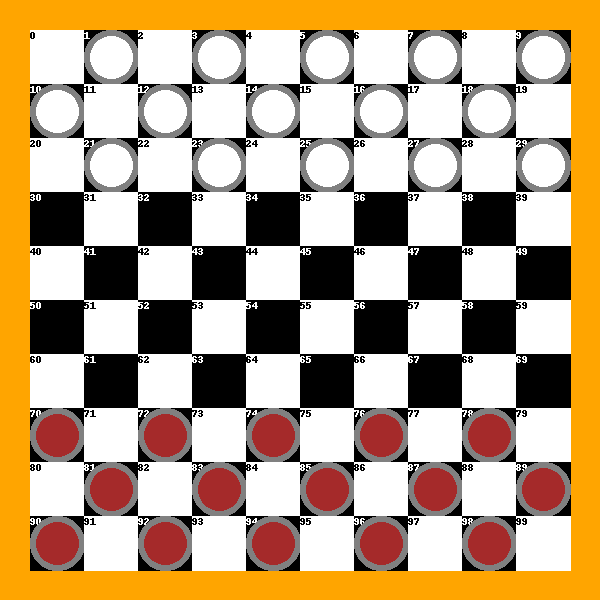

Jogadas válidas: 
{21: [30, 32], 23: [32, 34], 25: [34, 36], 27: [36, 38], 29: [38]}
Jogue no formato 'origem, destino' 21, 30


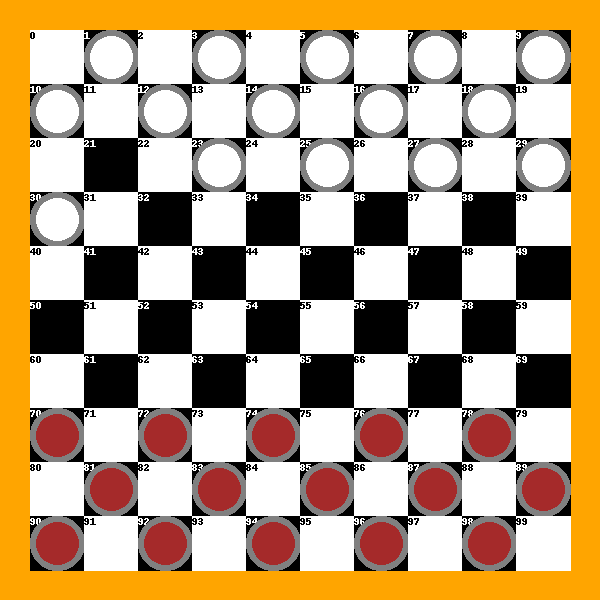

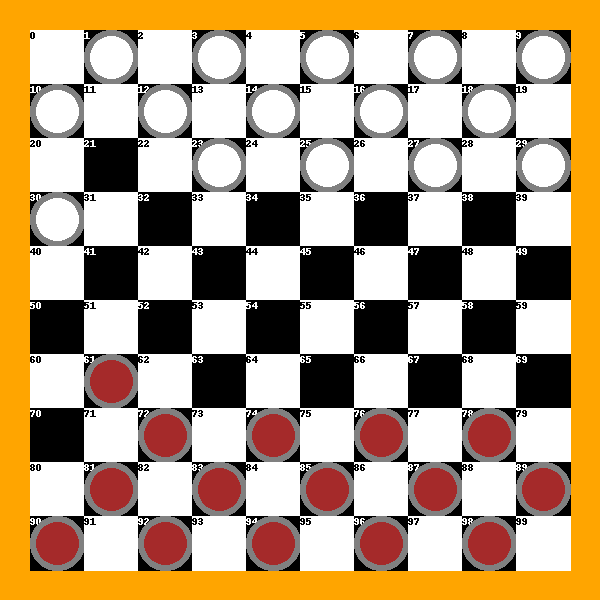

Jogadas válidas: 
{10: [21], 12: [21], 23: [32, 34], 25: [34, 36], 27: [36, 38], 29: [38], 30: [41]}
Jogue no formato 'origem, destino' 29, 38


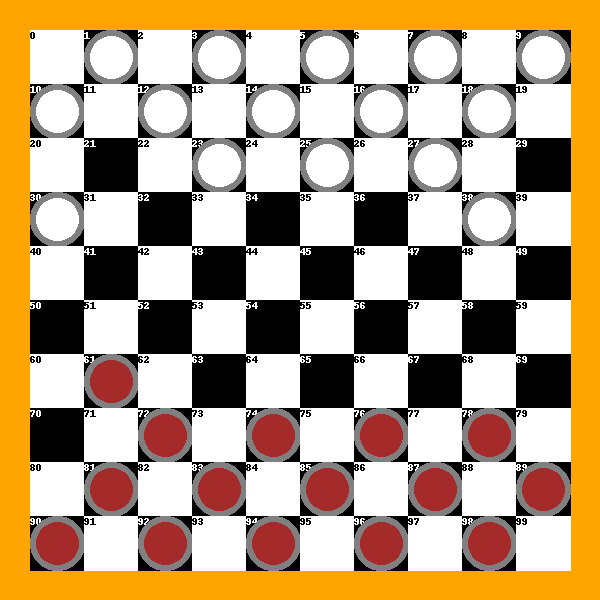

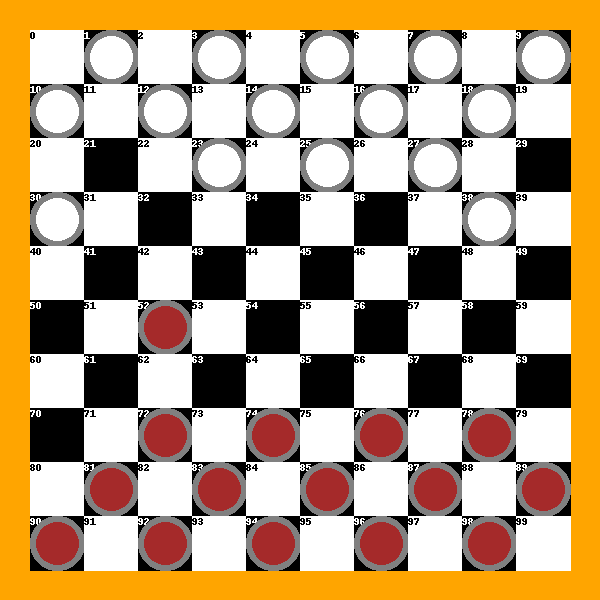

Jogadas válidas: 
{10: [21], 12: [21], 18: [29], 23: [32, 34], 25: [34, 36], 27: [36], 30: [41], 38: [47, 49]}
Jogue no formato 'origem, destino' 38, 49


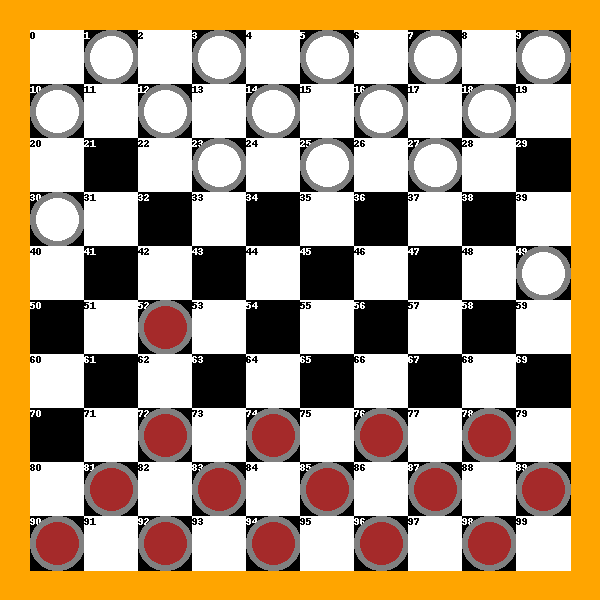

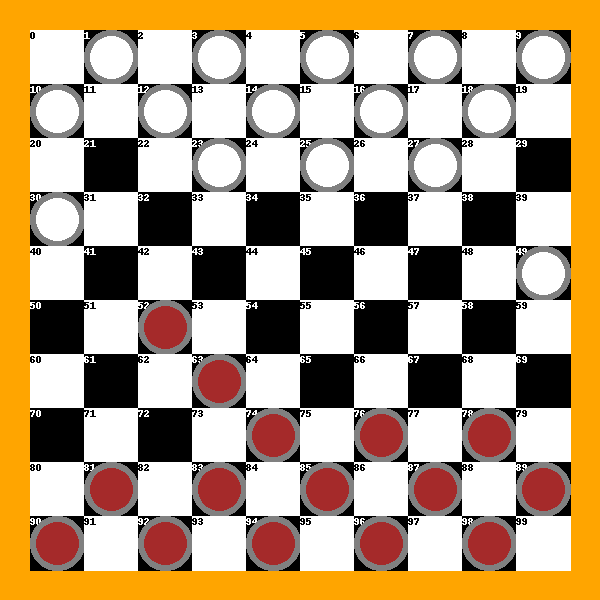

Jogadas válidas: 
{10: [21], 12: [21], 18: [29], 23: [32, 34], 25: [34, 36], 27: [36, 38], 30: [41], 49: [58]}
Jogue no formato 'origem, destino' 23, 32


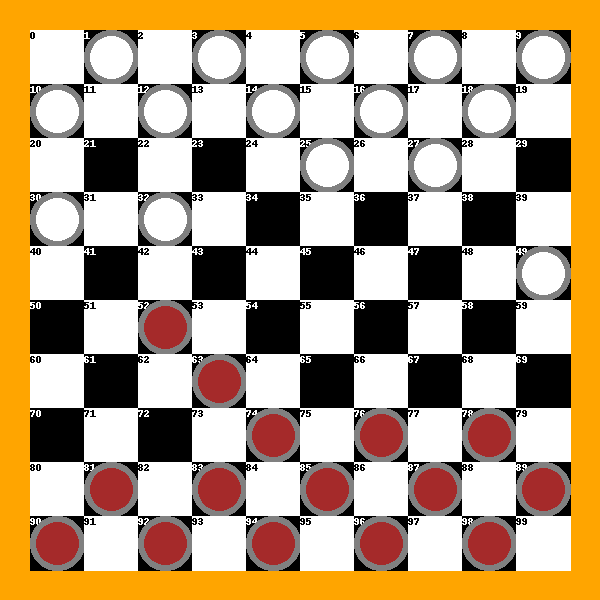

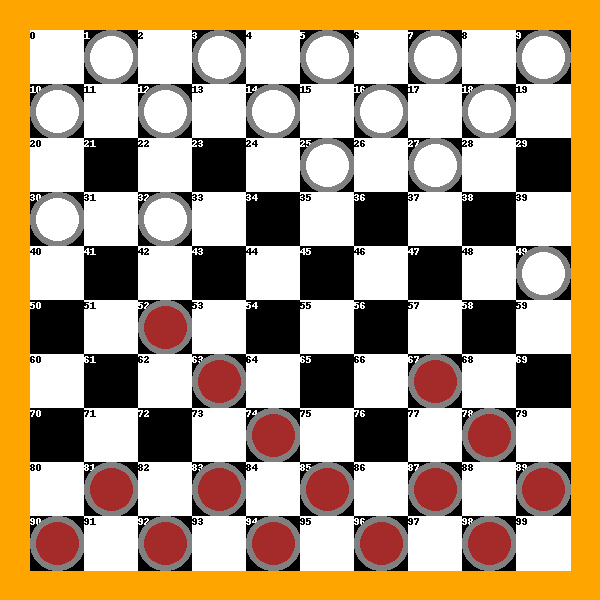

Jogadas válidas: 
{10: [21], 12: [21, 23], 14: [23], 18: [29], 25: [34, 36], 27: [36, 38], 30: [41], 32: [41, 43], 49: [58]}
Jogue no formato 'origem, destino' 32, 43


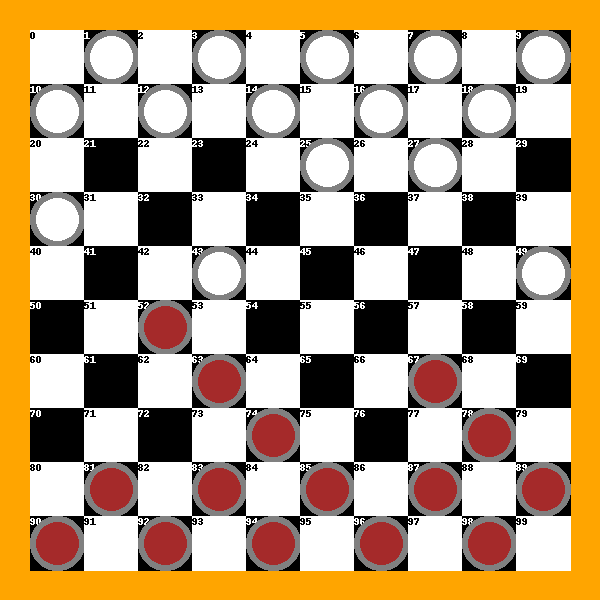

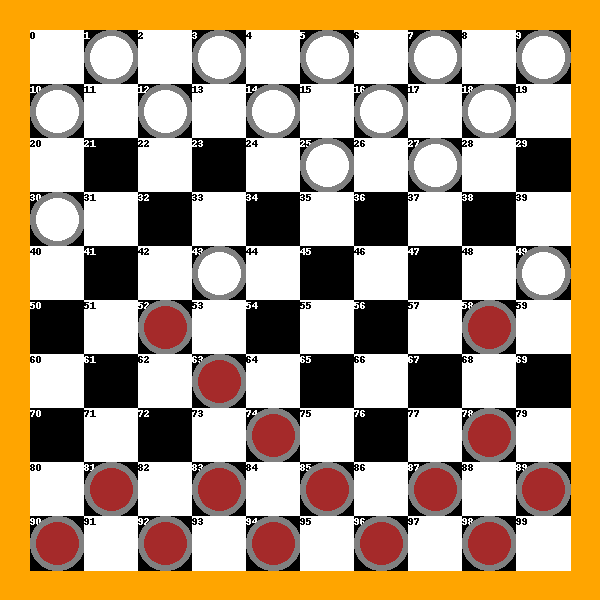

Jogadas válidas: 
{10: [21], 12: [21, 23], 14: [23], 18: [29], 25: [34, 36], 27: [36, 38], 30: [41], 43: [54, 61], 49: [67]}
Jogue no formato 'origem, destino' 27, 38


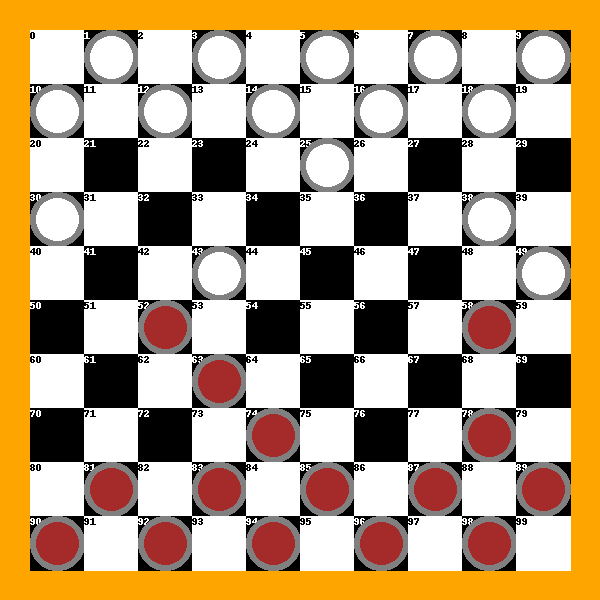

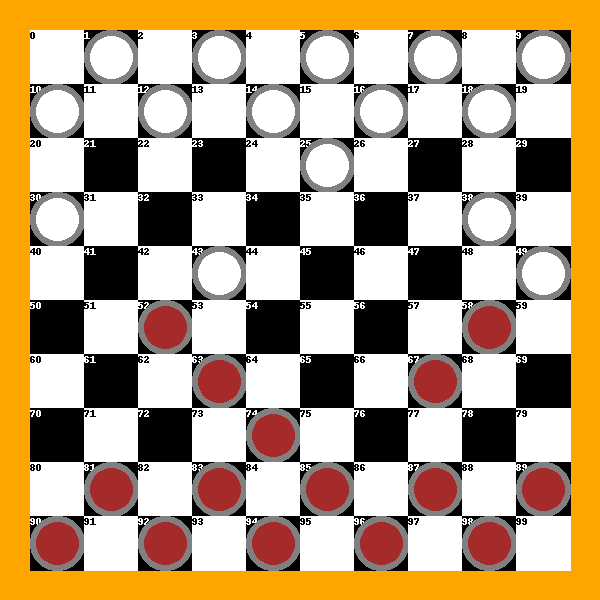

Jogadas válidas: 
{10: [21], 12: [21, 23], 14: [23], 16: [27], 18: [27, 29], 25: [34, 36], 30: [41], 38: [47], 43: [54, 61]}
Jogue no formato 'origem, destino' 12, 21


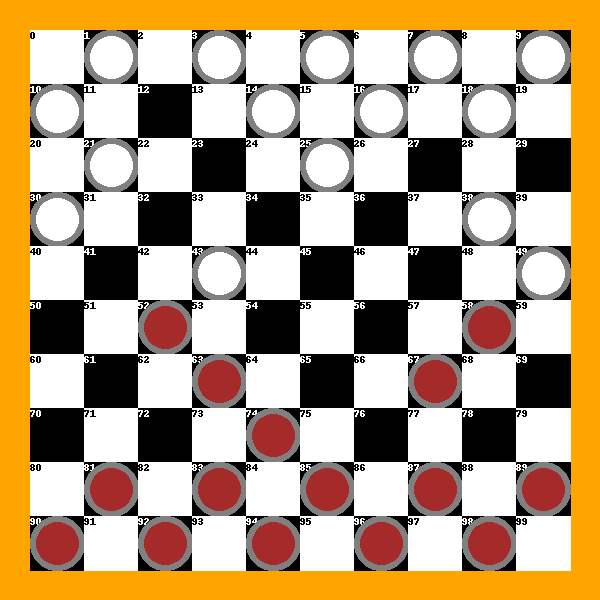

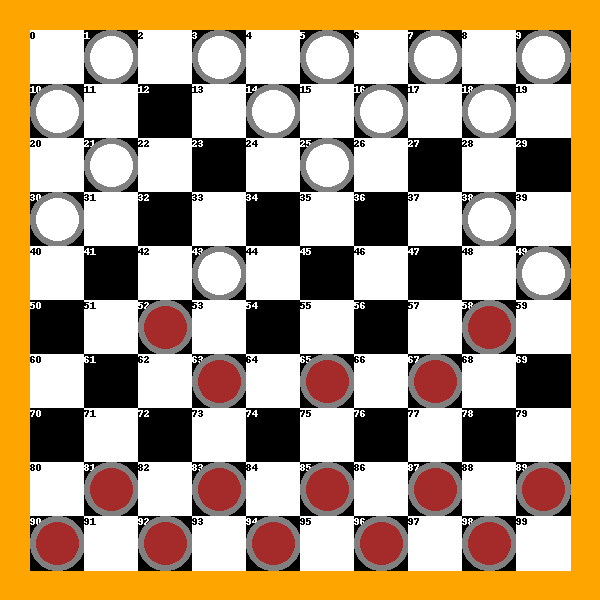

Jogadas válidas: 
{1: [12], 3: [12], 14: [23], 16: [27], 18: [27, 29], 21: [32], 25: [34, 36], 30: [41], 38: [47], 43: [54, 61]}
Jogue no formato 'origem, destino' 43, 61


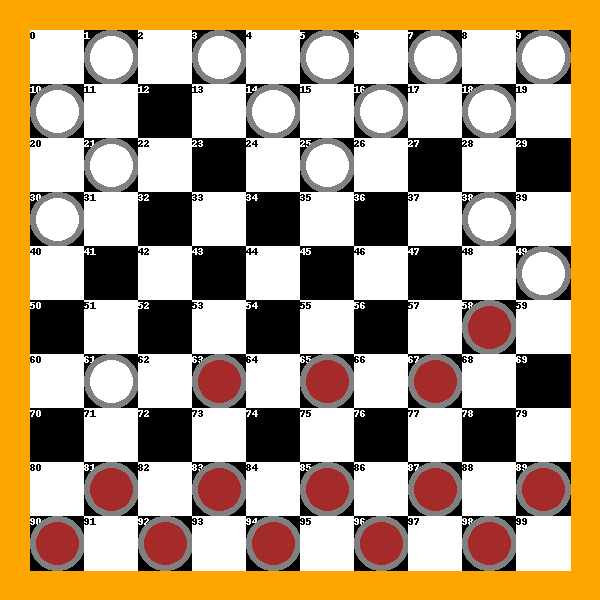

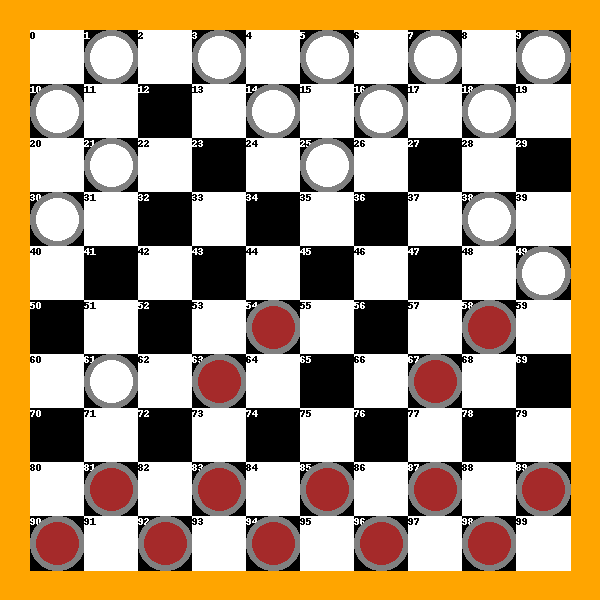

Jogadas válidas: 
{1: [12], 3: [12], 14: [23], 16: [27], 18: [27, 29], 21: [32], 25: [34, 36], 30: [41], 38: [47], 61: [70, 72]}
Jogue no formato 'origem, destino' 30, 41


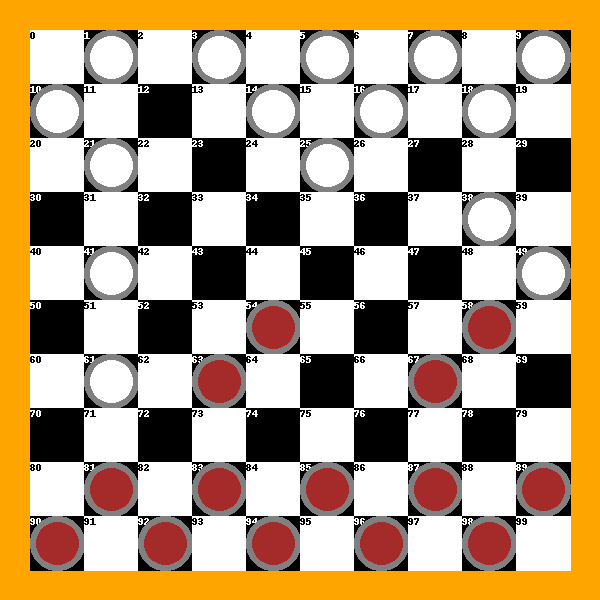

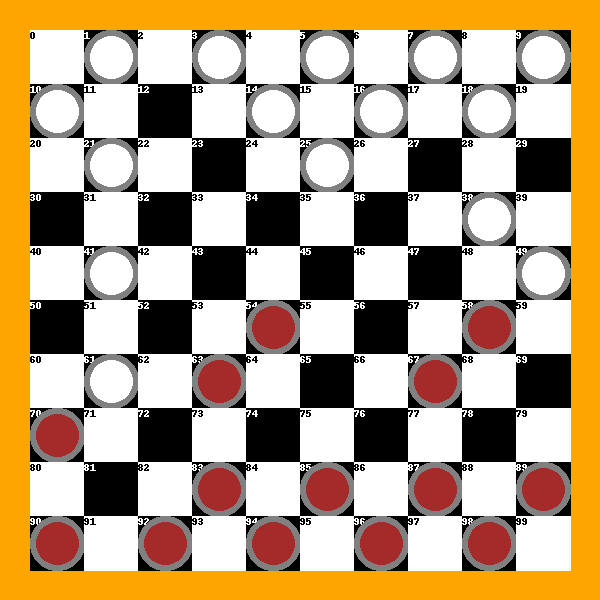

Jogadas válidas: 
{1: [12], 3: [12], 14: [23], 16: [27], 18: [27, 29], 21: [30, 32], 25: [34, 36], 38: [47], 41: [50, 52], 61: [72]}
Jogue no formato 'origem, destino' 25, 34


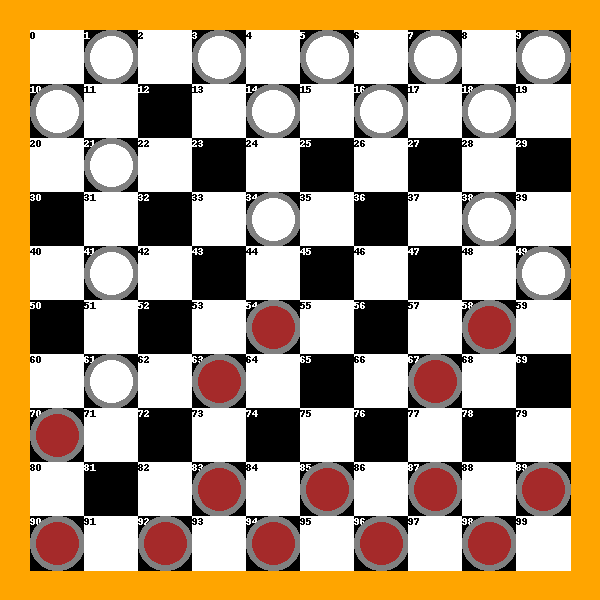

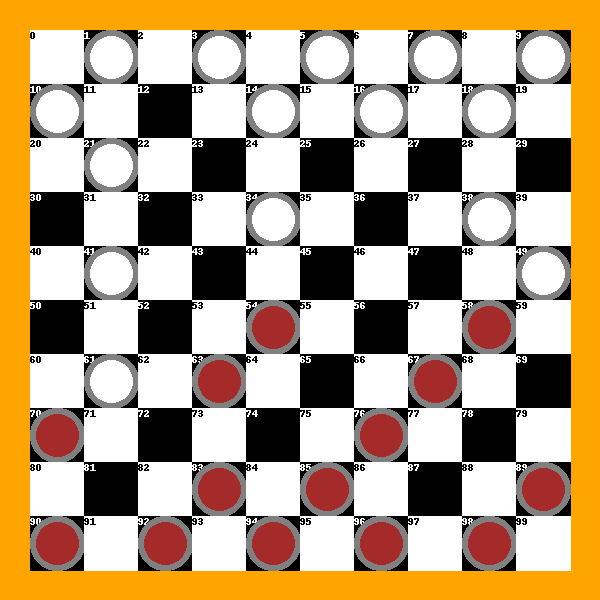

Jogadas válidas: 
{1: [12], 3: [12], 14: [23, 25], 16: [25, 27], 18: [27, 29], 21: [30, 32], 34: [43, 45], 38: [47], 41: [50, 52], 61: [72]}
Jogue no formato 'origem, destino' 18, 27


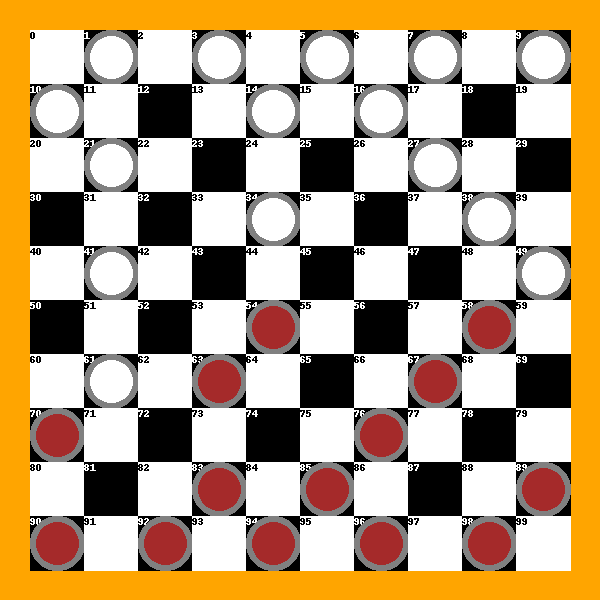

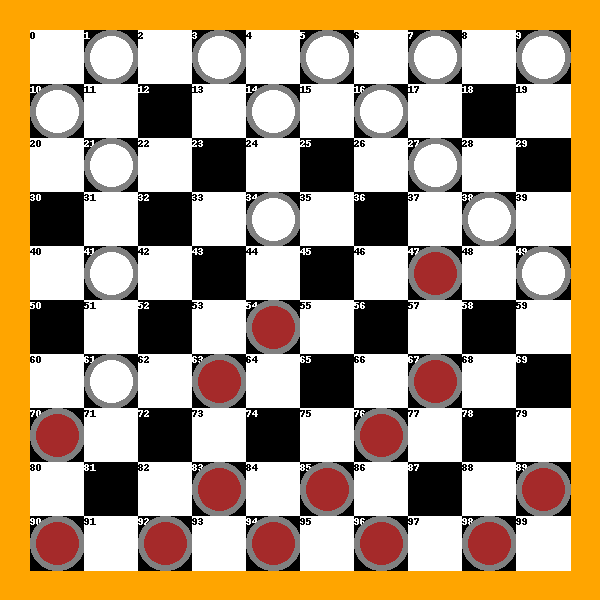

Jogadas válidas: 
{1: [12], 3: [12], 7: [18], 9: [18], 14: [23, 25], 16: [25], 21: [30, 32], 27: [36], 34: [43, 45], 38: [56], 41: [50, 52], 49: [58], 61: [72]}
Jogue no formato 'origem, destino' 38, 56


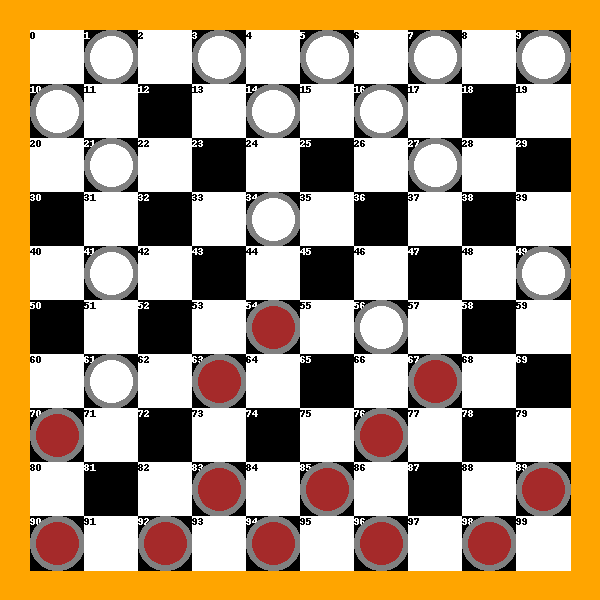

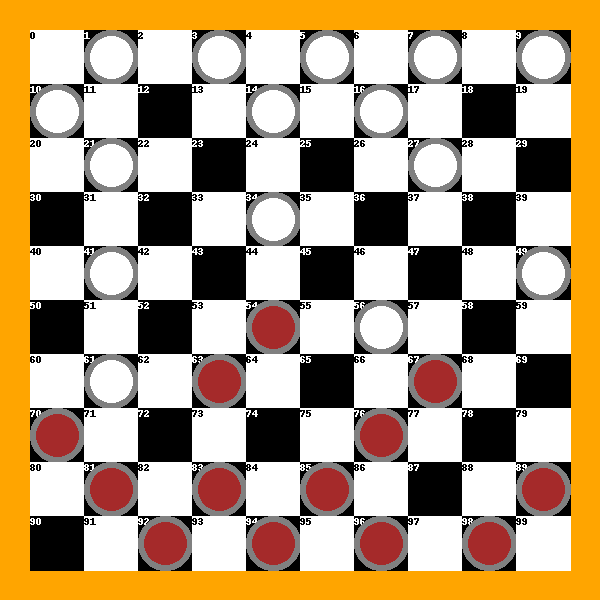

Jogadas válidas: 
{1: [12], 3: [12], 7: [18], 9: [18], 14: [23, 25], 16: [25], 21: [30, 32], 27: [36, 38], 34: [43, 45], 41: [50, 52], 49: [58], 56: [65, 78], 61: [72]}
Jogue no formato 'origem, destino' 56, 65


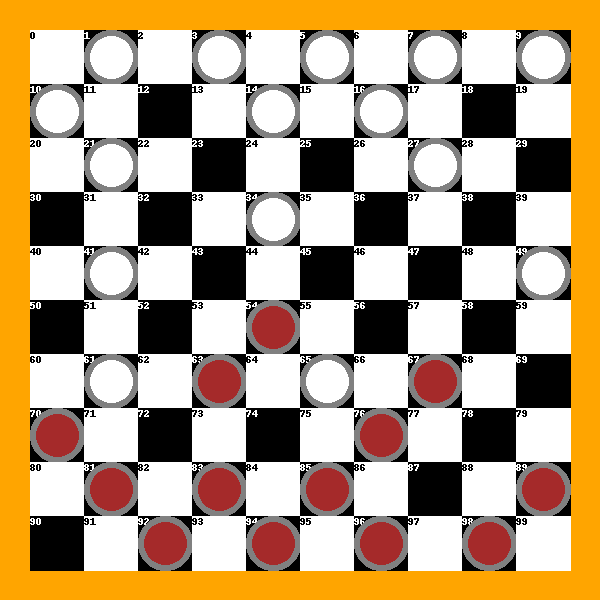

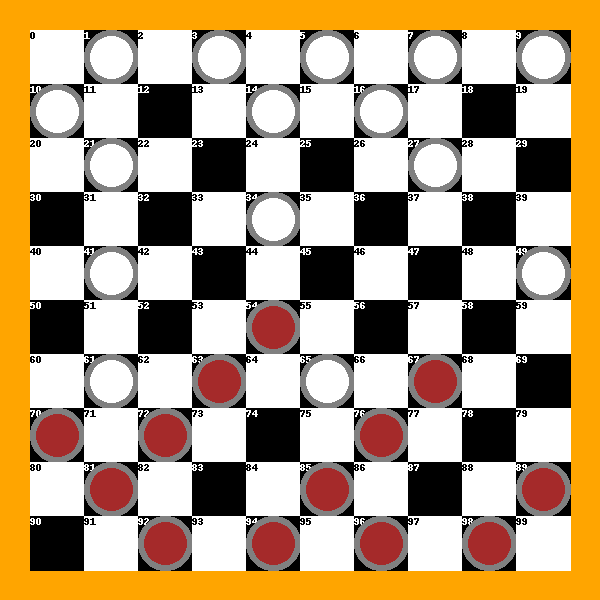

Jogadas válidas: 
{1: [12], 3: [12], 7: [18], 9: [18], 14: [23, 25], 16: [25], 21: [30, 32], 27: [36, 38], 34: [43, 45], 41: [50, 52], 49: [58], 61: [83], 65: [74, 87]}
Jogue no formato 'origem, destino' 21, 32


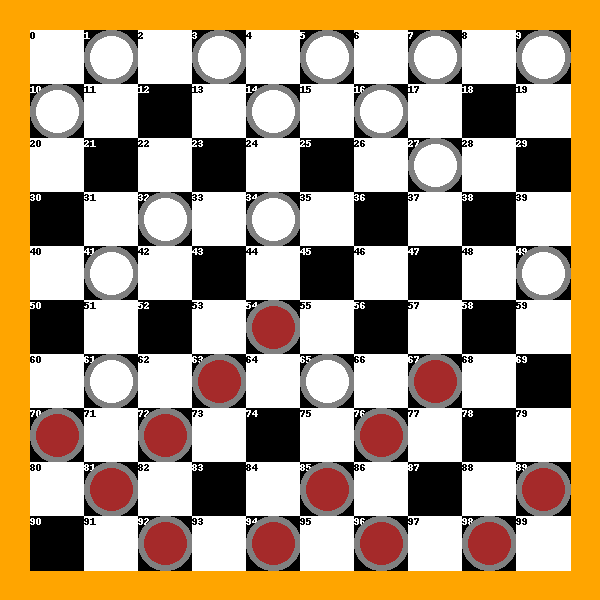

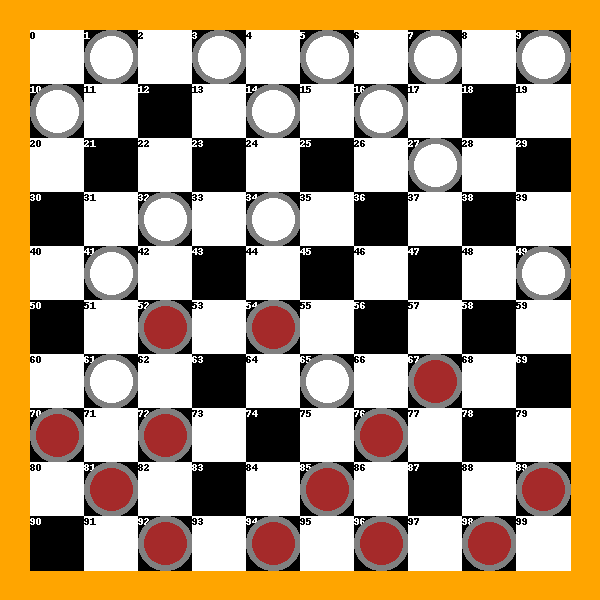

Jogadas válidas: 
{1: [12], 3: [12], 7: [18], 9: [18], 10: [21], 14: [23, 25], 16: [25], 27: [36, 38], 32: [43], 34: [43, 45], 41: [50, 63], 49: [58], 61: [83], 65: [74, 87]}
Jogue no formato 'origem, destino' 41, 63


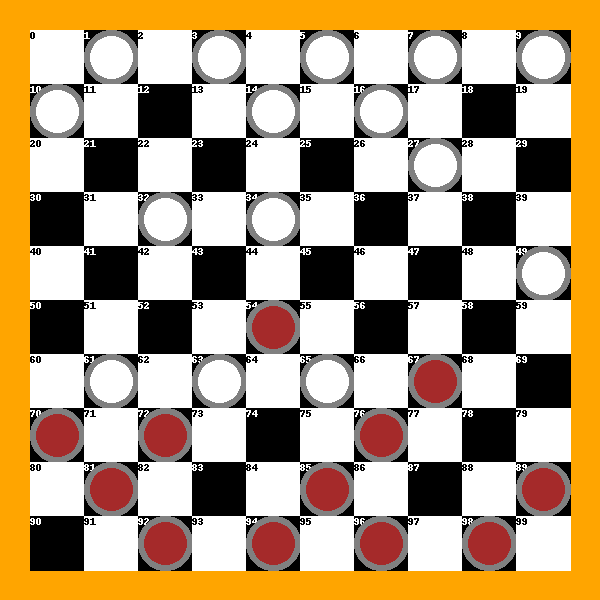

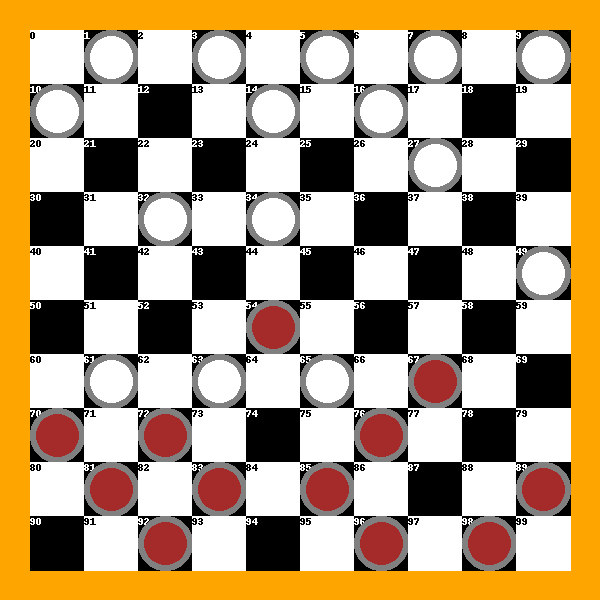

Jogadas válidas: 
{1: [12], 3: [12], 7: [18], 9: [18], 10: [21], 14: [23, 25], 16: [25], 27: [36, 38], 32: [41, 43], 34: [43, 45], 49: [58], 63: [74], 65: [74, 87]}
Jogue no formato 'origem, destino' 27, 36


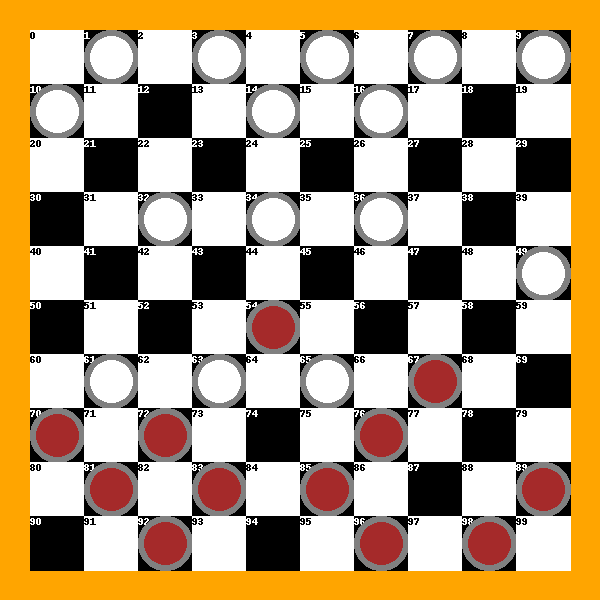

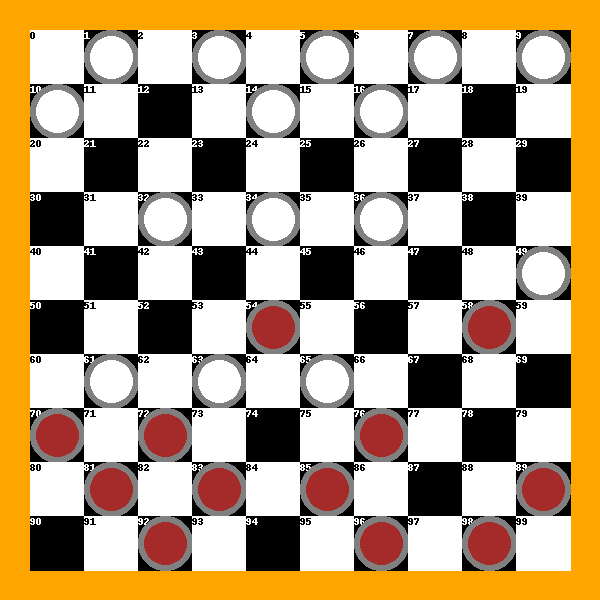

Jogadas válidas: 
{1: [12], 3: [12], 7: [18], 9: [18], 10: [21], 14: [23, 25], 16: [25, 27], 32: [41, 43], 34: [43, 45], 36: [45, 47], 49: [67], 63: [74], 65: [74, 87]}
Jogue no formato 'origem, destino' 16, 27


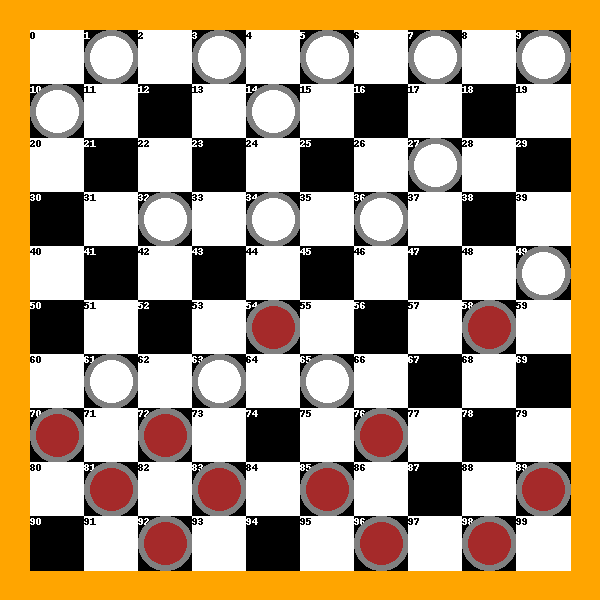

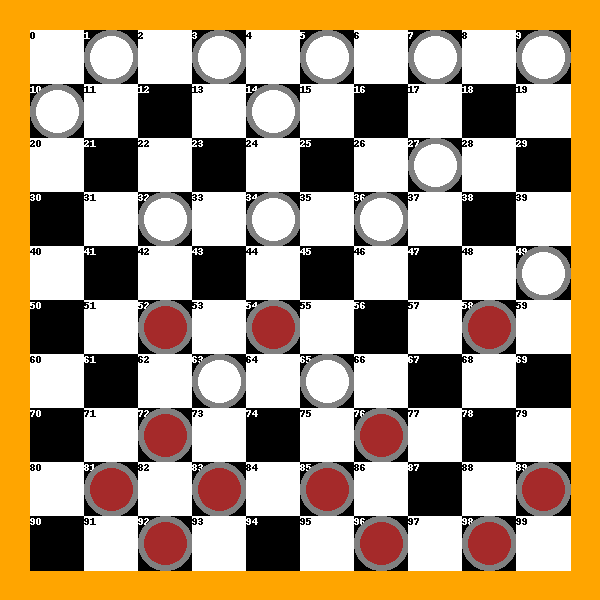

Jogadas válidas: 
{1: [12], 3: [12], 5: [16], 7: [16, 18], 9: [18], 10: [21], 14: [23, 25], 27: [38], 32: [41, 43], 34: [43, 45], 36: [45, 47], 49: [67], 63: [74], 65: [74, 87]}
Jogue no formato 'origem, destino' 14, 25


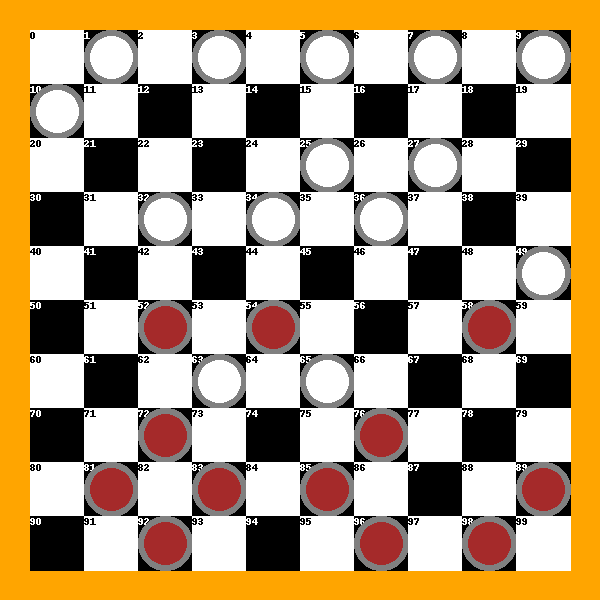

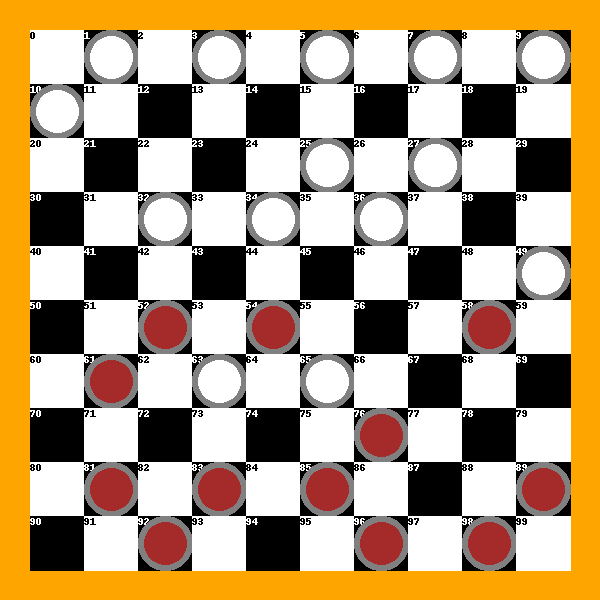

Jogadas válidas: 
{1: [12], 3: [12, 14], 5: [14, 16], 7: [16, 18], 9: [18], 10: [21], 27: [38], 32: [41, 43], 34: [43, 45], 36: [45, 47], 49: [67], 63: [72, 74], 65: [74, 87]}
Jogue no formato 'origem, destino' 10, 21


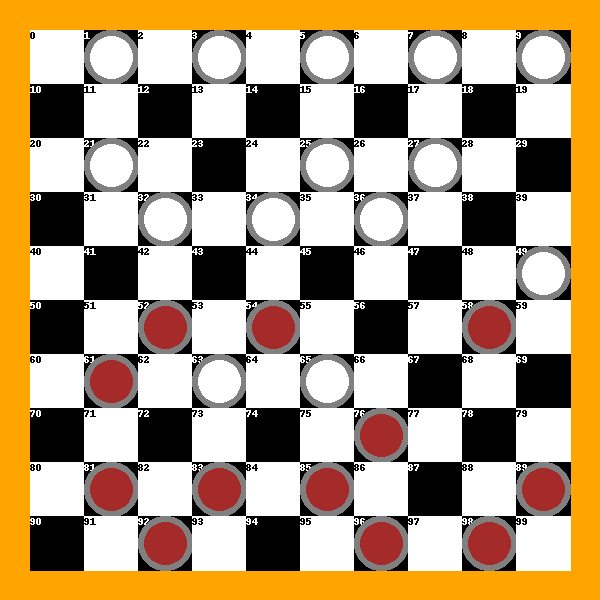

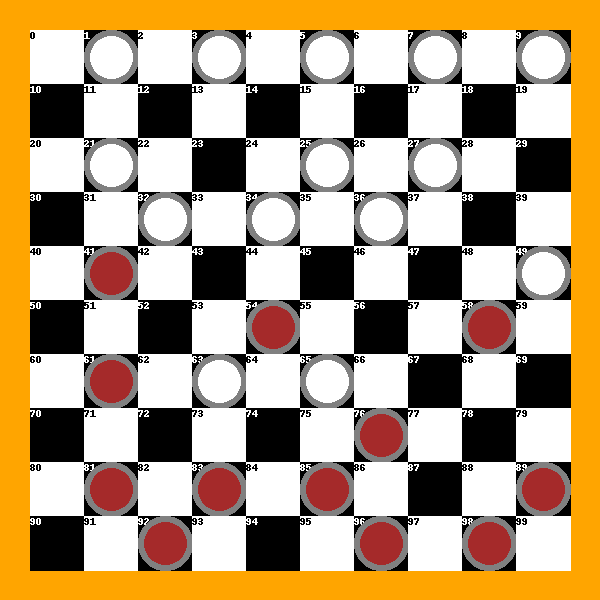

Jogadas válidas: 
{1: [10, 12], 3: [12, 14], 5: [14, 16], 7: [16, 18], 9: [18], 21: [30], 27: [38], 32: [43, 50], 34: [43, 45], 36: [45, 47], 49: [67], 63: [72, 74], 65: [74, 87]}
Jogue no formato 'origem, destino' 32, 50


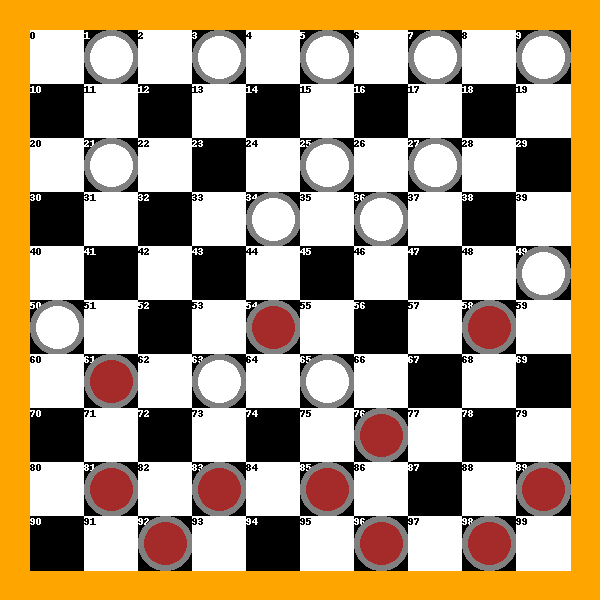

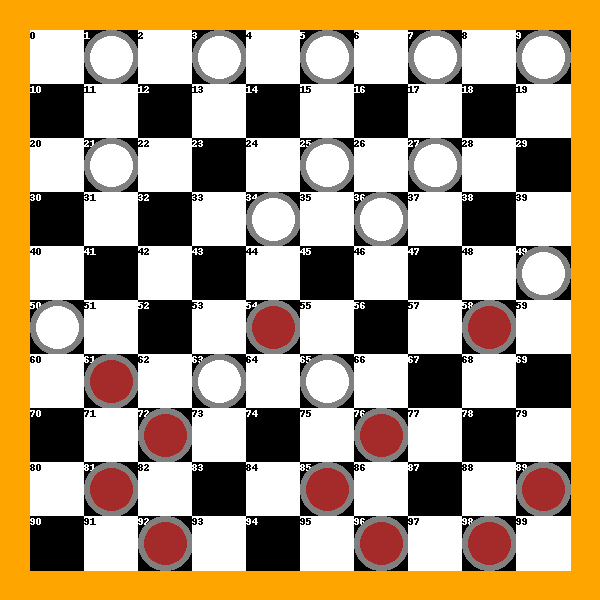

Jogadas válidas: 
{1: [10, 12], 3: [12, 14], 5: [14, 16], 7: [16, 18], 9: [18], 21: [30, 32], 27: [38], 34: [43, 45], 36: [45, 47], 49: [67], 63: [74], 65: [74, 87]}
Jogue no formato 'origem, destino' 21, 30


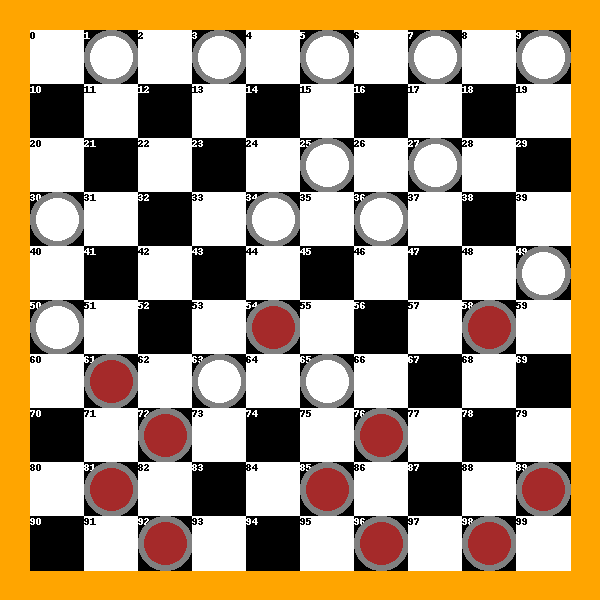

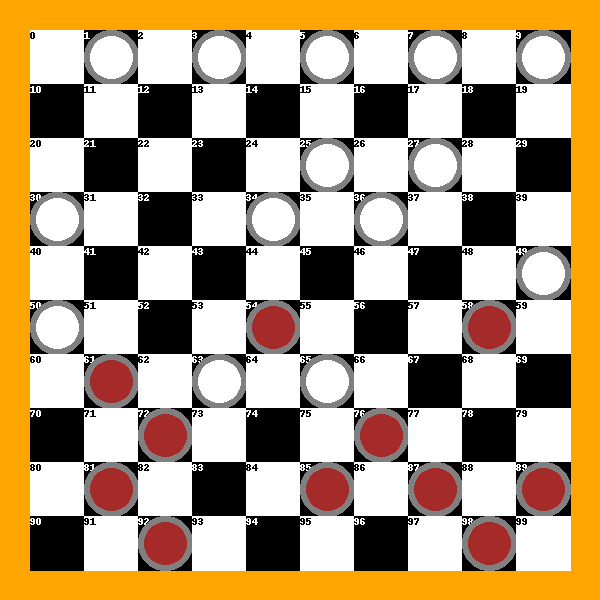

Jogadas válidas: 
{1: [10, 12], 3: [12, 14], 5: [14, 16], 7: [16, 18], 9: [18], 27: [38], 30: [41], 34: [43, 45], 36: [45, 47], 49: [67], 63: [74], 65: [74]}
Jogue no formato 'origem, destino' 1, 10


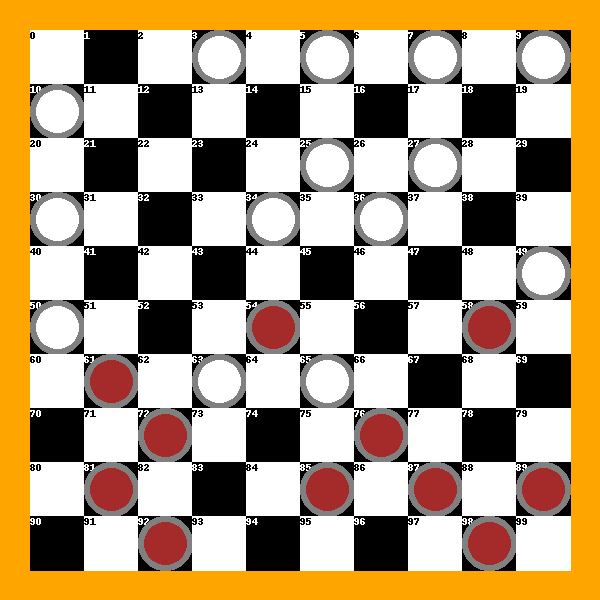

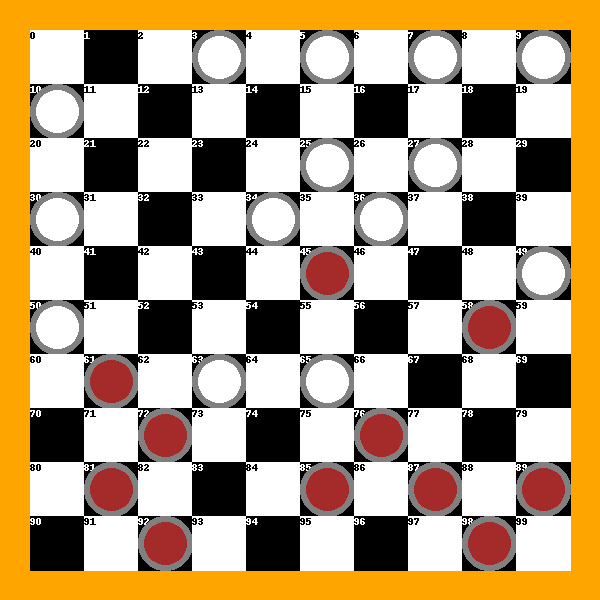

Jogadas válidas: 
{3: [12, 14], 5: [14, 16], 7: [16, 18], 9: [18], 10: [21], 27: [38], 30: [41], 34: [43, 56], 36: [47, 54], 49: [67], 63: [74], 65: [74]}
Jogue no formato 'origem, destino' 36, 54


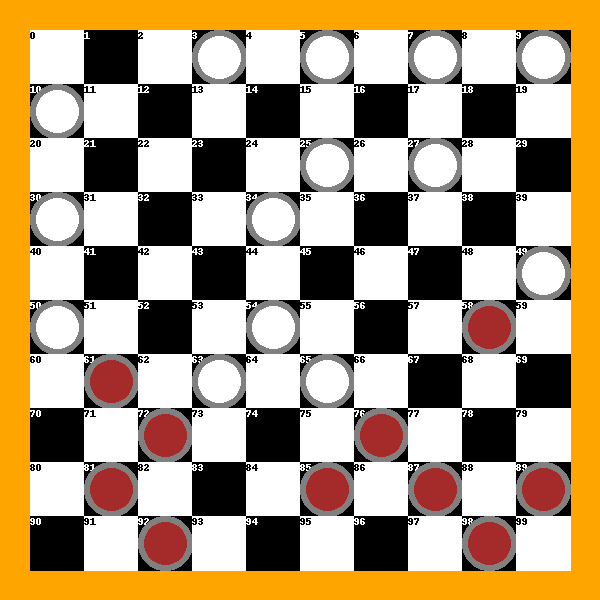

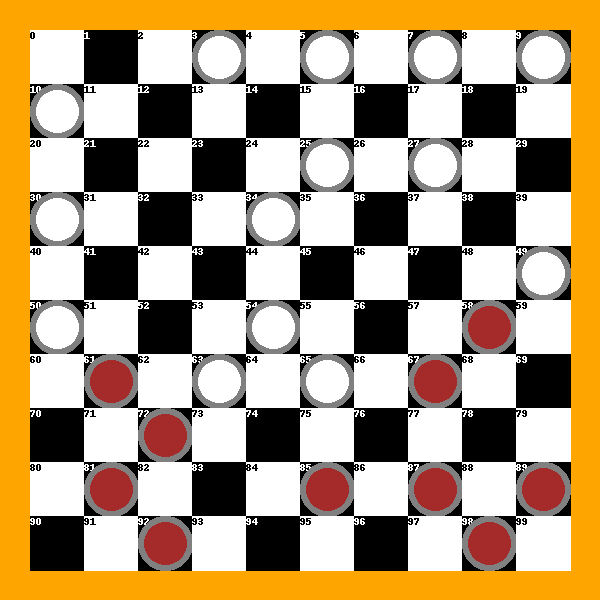

Jogadas válidas: 
{3: [12, 14], 5: [14, 16], 7: [16, 18], 9: [18], 10: [21], 25: [36], 27: [36, 38], 30: [41], 34: [43, 45], 63: [74], 65: [74, 76]}
Jogue no formato 'origem, destino' 7, 16


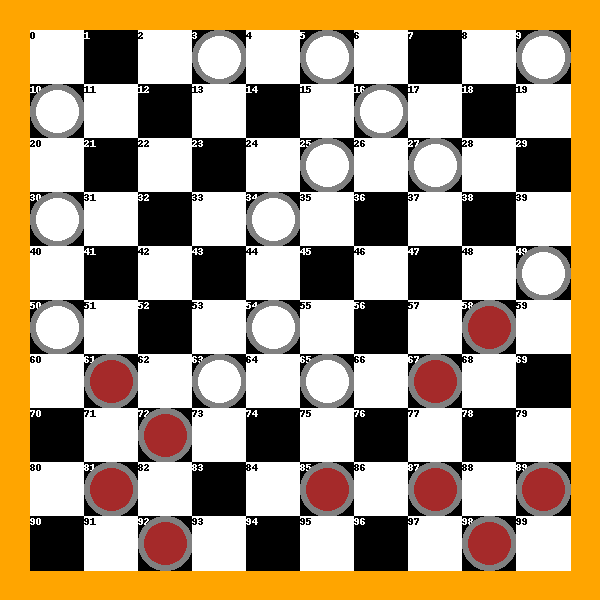

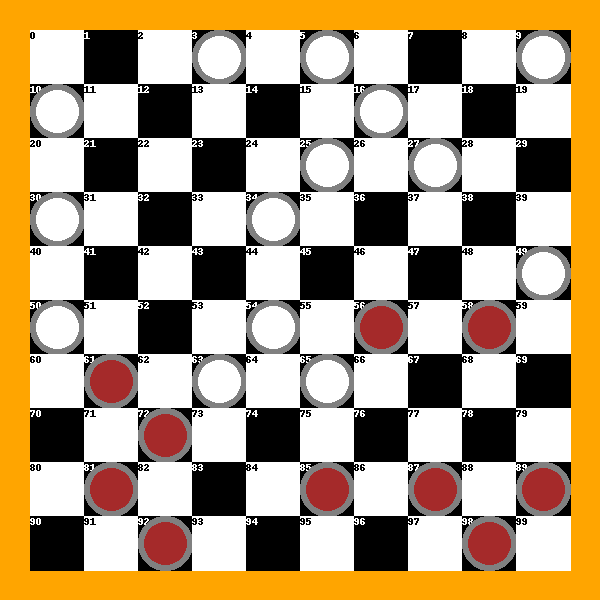

Jogadas válidas: 
{3: [12, 14], 5: [14], 9: [18], 10: [21], 25: [36], 27: [36, 38], 30: [41], 34: [43, 45], 49: [67], 63: [74], 65: [74, 76]}
Jogue no formato 'origem, destino' 27, 38


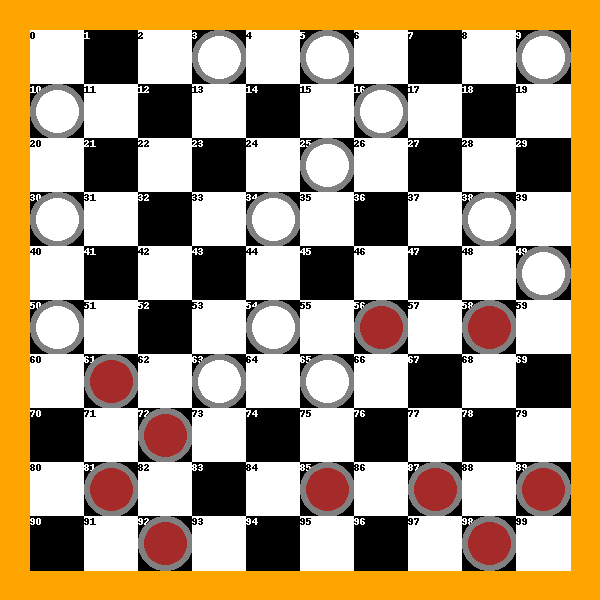

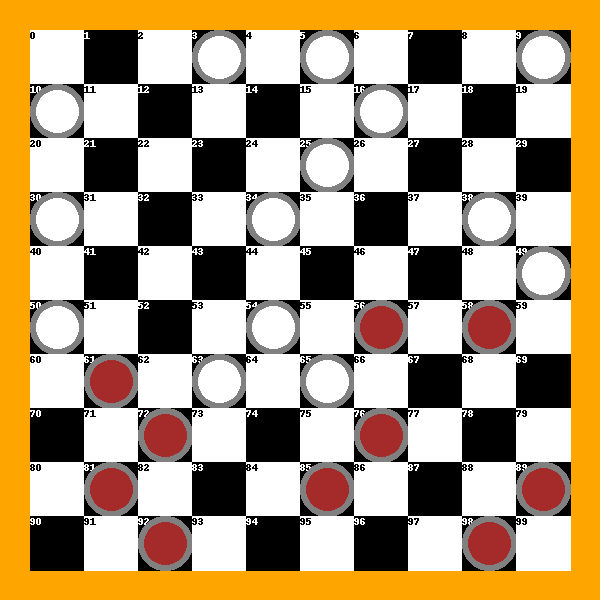

Jogadas válidas: 
{3: [12, 14], 5: [14], 9: [18], 10: [21], 16: [27], 25: [36], 30: [41], 34: [43, 45], 38: [47], 49: [67], 63: [74], 65: [74, 87]}
Jogue no formato 'origem, destino' 3, 12


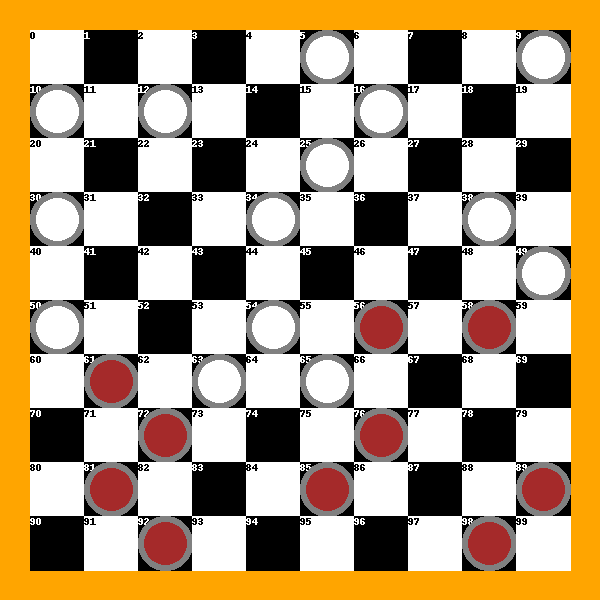

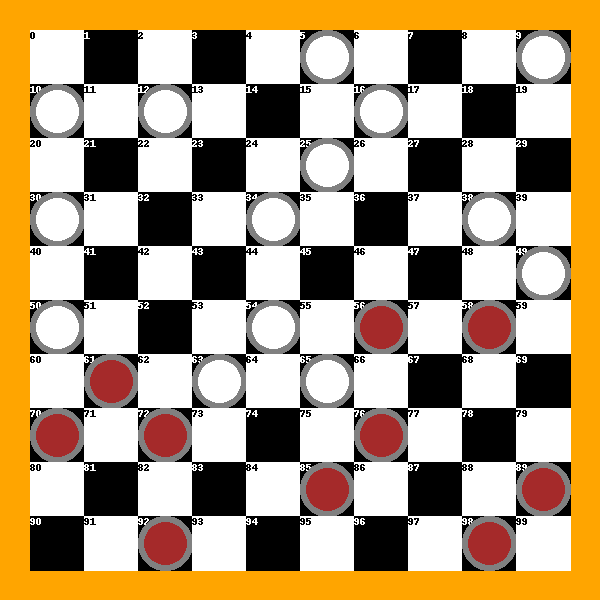

Jogadas válidas: 
{5: [14], 9: [18], 10: [21], 12: [21, 23], 16: [27], 25: [36], 30: [41], 34: [43, 45], 38: [47], 49: [67], 63: [74, 81], 65: [74, 87]}
Jogue no formato 'origem, destino' 65, 74


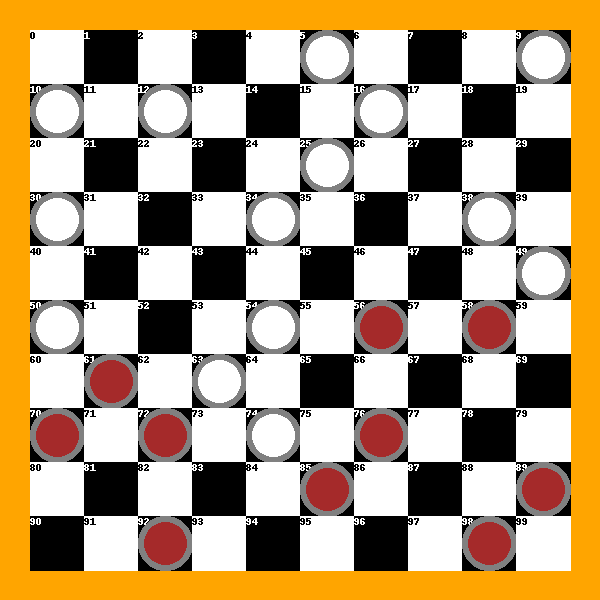

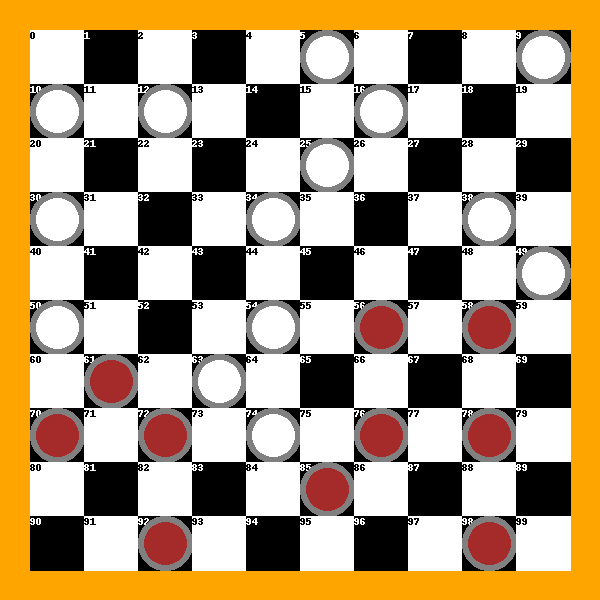

Jogadas válidas: 
{5: [14], 9: [18], 10: [21], 12: [21, 23], 16: [27], 25: [36], 30: [41], 34: [43, 45], 38: [47], 49: [67], 54: [65], 63: [81], 74: [83, 96]}
Jogue no formato 'origem, destino' 74, 96


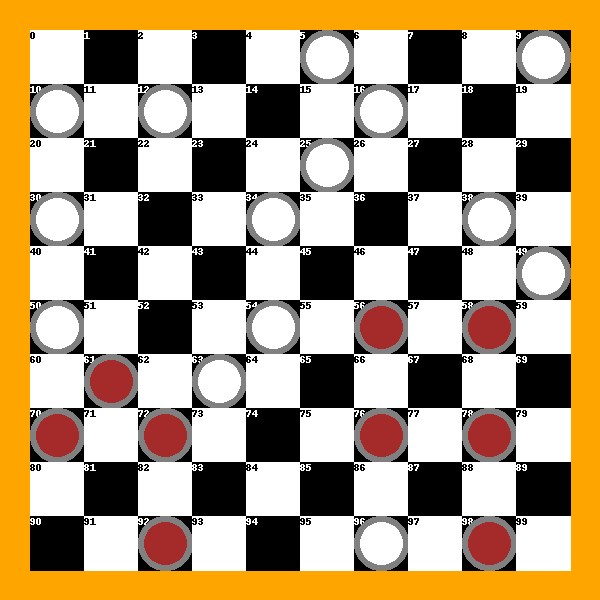

interactive(children=(IntSlider(value=66, description='frame', max=133), Output()), _dom_classes=('widget-inte…

In [ ]:
resultadoCampeonato  = campeonato(tabuleiro.humanPlayer, player_rl, num_games = 1)
#print("Resultado do knowleadge = "+str(resultadoK)+" ; resultado do campeonato = "+str(resultadoCampeonato))

#results = campeonato(tabuleiro.bot, tabuleiro.player_rl)
#print("Draw = %i, Acaso = %i, RL = %i" % results)

#results = campeonato(tabuleiro.player_rl, tabuleiro.bot)
#print("Draw = %i, RL = %i, Acaso = %i" % results)